# The numpy.random package

### About Numpy.random
The numpy.random package is a sub-package of the Numpy library<sup>[1](http://www.numpy.org/)</sup> for the Python programming language. Numpy is used for dealing with multi-dimensional arrays of values and matrix operations in data analysis. While it’s a powerful and widely used package, users seldom interact directly with it - it’s typically accessed via one of the sub-packages such as numpy.random.

### It’s Purpose
The purpose of numpy.random is to provide users with a selection of methods by which pseudo random numbers can be generated for use in various applications. Perhaps the classic application is in the creation of sampling plans. 

While its not currently possible for a computer to create truly random values, pseudo random numbers (derived from any method using computational algorithms) offer a useful simulation of actual random values. In theory, a higher degree of apparent randomness may characterise numbers generated from methods using electromagnetic atmospheric noise as a source input. <sup>[2](https://en.wikipedia.org/wiki/Random_number_generation) </sup> With the advent of ‘quantum computing’ perhaps it may finally become possible to generate truly random values. 

### Who needs random numbers?
Aside from their frequent use in sampling and simulations, one real-world application for pseudo random numbers which I have personally encountered is in the online gaming industry. In this case, a stream of pseudo random numbers is accessed by connected gaming terminals in bookmakers shops, pubs etc to produce results in so-called “games of chance”, where the user’s skills have no influence on the result. As a mission critical component in the network, the random number generator (RNG) runs 24x7 for 365 days a year, and any interruption of service is flagged by loud alarms in the HQ where the operations team quickly work to restore service!

### Sampling Methods
Sampling Methods can be classified into one of two categories:<sup>[3](https://onlinecourses.science.psu.edu/stat100/node/18/)</sup>

1) Probability Sampling: The sample has a known probability of being selected. All of the distributions illustrated here are examples of probability sampling.These techniques are more likely to yield a sample which is representative of the whole population, to within a calculated margin of error.

2) Non-probability Sampling: The sample does not have a known probability of being selected. In contrast with probability sampling, a non-probability sample is not a product of a randomized selection processes. Subjects in a non-probability sample are usually selected on the basis of their accessibility or by the personal judgment of the researcher. <sup>[4](https://explorable.com/non-probability-sampling)</sup> Such techniques are unlikely to yield a sample which is representative of the whole population.


### Use of the Simple Random Data functions 
The “Simple random data” functions<sup>[5](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html#)</sup> in numpy.random provide a range of methods for creating random values in a variety of arrays, formats and structures, depending on the specific needs of the user. This is a good starting point for devising a simple sampling plan. 


### Using numpy.random.rand
Simple random data functions in numpy.random begin with numpy.random.rand <sup>[6](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand)</sup>, which allows you to create an array of a given shape and populate it with random floating values of a uniform distribution, from 0 to 0.99999999.
For example, here's an array of 3 sets of sample values, of 4 rows and 3 columns each, generated by np.random.rand 

In [1]:
import numpy as np

In [2]:
np.random.rand(3,4,3)

array([[[0.34947011, 0.42220217, 0.04215   ],
        [0.87438021, 0.25614705, 0.81475272],
        [0.24229407, 0.34810174, 0.88231237],
        [0.77832731, 0.21234618, 0.19168772]],

       [[0.51513984, 0.16237077, 0.01993893],
        [0.88485856, 0.19461267, 0.57992416],
        [0.28248679, 0.99387168, 0.61684706],
        [0.41525788, 0.20340007, 0.93346534]],

       [[0.38797402, 0.91467331, 0.9118926 ],
        [0.42560976, 0.2921383 , 0.80841438],
        [0.37145079, 0.26359183, 0.54897005],
        [0.70252777, 0.78967687, 0.49998196]]])

Even in such small sample sizes, each of these values is almost as likely to appear in the array as any other, as it's a uniform distribution.

### Using numpy.random.int

Another simple random data function is numpy.random.int <sup>[7](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.randint.html#numpy.random.randint)</sup>, which can create an array of integers between defined low & high limits, from the “discrete uniform” distribution in the closed interval [low, high]. For example, to create an array of 10 integers, greater than 0 and less than or equal to 100 :

In [3]:
np.random.randint(100, size=10)

array([21, 22, 82, 94, 15, 21, 80, 88, 14, 79])

### Permutations
The “Permutation” functions offer a range of methods for randomising the arrangement (or order) of a defined sequence of values. This could be a good starting point for a programmer creating a music shuffle function.

In [4]:
import numpy as np

Here is an example of a permutation function using the shuffle command, starting with an initial array:

In [5]:
arr = np.arange(15)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Here it is, randomly shuffled:

In [6]:
np.random.shuffle(arr)
arr

array([ 4,  5,  7, 10,  1,  0,  8,  2, 13,  6, 11,  9, 12,  3, 14])

Incidently, how many permutations are possible in this example? How many unique ways could you arrange 15 books on a shelf? The answer is 15*14*13*12*11*10*9*8*7*6*5*4*3*2*1 or "factorial 15", expressed as 15! - and the number of permutations is 1.3076744e+12 .... or 1,307,674,368,000 

## About Probability Distributions

A probability distribution is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.<sup>[8](https://en.wikipedia.org/wiki/Probability_distribution#Applications)</sup>
The concept of the probability distribution and the random variables which they describe underlies the mathematical discipline of probability theory, and the science of statistics. There is spread or variability in almost any value that can be measured in a population (e.g. height of people, durability of a metal, sales growth, traffic flow, etc.). 

Examples of Probability distributions include the following:

### Visualising Distributions
To illustrate the distribution of random values generated by the np.random.rand function, we can use it to generate a sample of values and then plot them using matplotlib:

### Uniform

In [7]:
import matplotlib.pyplot as plt

Generate 30,000 random values of between 0 and 0.99999999

In [8]:
x = np.random.rand(30000)
x

array([0.73195632, 0.89244994, 0.63378666, ..., 0.03506701, 0.98407361,
       0.03624648])

Plot the distribution of these values in a histogram

(array([2916., 3033., 3034., 2945., 3078., 3067., 2977., 2991., 2966.,
        2993.]),
 array([1.44820570e-05, 1.00008163e-01, 2.00001844e-01, 2.99995525e-01,
        3.99989206e-01, 4.99982887e-01, 5.99976568e-01, 6.99970249e-01,
        7.99963931e-01, 8.99957612e-01, 9.99951293e-01]),
 <a list of 10 Patch objects>)

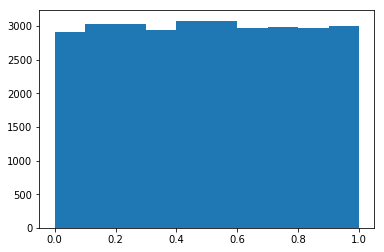

In [9]:
plt.hist(x)

That's what a randomly generated, essentially uniform distribution looks like. It's uniform insofaras every value in the range defined had an equal chance of being picked. We see approx 3,000 appearances of each value. 

Another function which generates a uniform distribution isnp.random.uniform :

In [17]:
s = np.random.uniform(-10,-9,100)

the np.random.uniform function seems to show a quite different looking distribution for this 100 sample, but the larger the sample size the more uniform it looks.

(array([ 9., 10.,  8.,  7., 10.,  9., 14., 13.,  9., 11.]),
 array([-9.99284531, -9.89450086, -9.79615642, -9.69781198, -9.59946754,
        -9.5011231 , -9.40277866, -9.30443421, -9.20608977, -9.10774533,
        -9.00940089]),
 <a list of 10 Patch objects>)

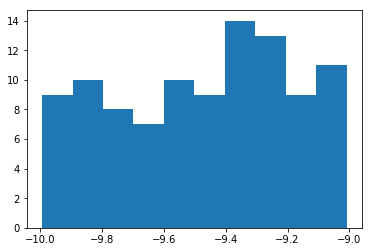

In [11]:
plt.hist(s)

### Normal

A Normal (or Gaussian) distribution is related to real-valued quantities that grow linearly (e.g. errors, offsets). Its the most common continuous distribution. We can use the 'numpy.random.normal' function which generates a normal distribution looking more like the classic 'bell curve'.

In [12]:
y = np.random.normal(0,0.1,1000)

(array([ 11.,  40.,  79., 172., 230., 215., 142.,  73.,  29.,   9.]),
 array([-0.28981881, -0.23175765, -0.17369648, -0.11563532, -0.05757416,
         0.000487  ,  0.05854816,  0.11660933,  0.17467049,  0.23273165,
         0.29079281]),
 <a list of 10 Patch objects>)

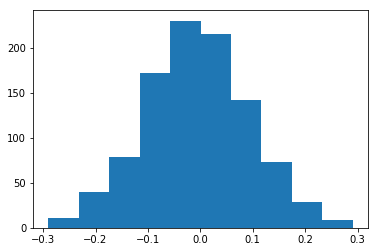

In [13]:
plt.hist(y)

This Normal distribution shows observations clustered around the Mean value of zero. The chances of values close to zero being picked are greater than for those at the extremities of the distribution. Typically 95% of all observations in a Normal distribution fall within +/- 2 Standard Deviations from the Mean.

Notice that its the 1st digit in np.random.normal (0,0.1,10000) which defines the MEAN in this distribution - in this case 0. You can make it any value you choose. Equally, the 2nd digit defines the intervals in the range.

### Pareto

The Pareto distribution seeks to describe quantities which have a particular property: namely, that a few items account for a lot of it and a lot of items account for a little of it.

For example, if we think of wealth distribition, a small fraction of the people (the few richest ones) tend to account for a large fraction of total income, and a large fraction of the people tend to account for a small fraction of total income. 
https://math.stackexchange.com/questions/24204/understanding-the-pareto-distribution-as-applied-to-wealth

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


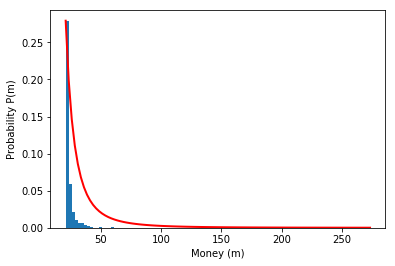

In [14]:
# Using the pareto function to draw samples from the distribution:
a, m = 2, 3.  # shape and mode
s = (np.random.pareto(a, 1000) + 7) * m

# Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
count, bins, _ = plt.hist(s, 100, normed=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.xlabel ('Money (m)')
plt.ylabel ('Probability P(m)')
plt.show ()

This pareto distribution illustrates the probabilty of a given individual securing a given share of the wealth in a country (Money(m)) - so its far more probable they will secure a small share, than it is likely they will get a large share.

### Binomial

The binomial distribution model is an important probability model that is used when there are two possible outcomes (hence "binomial"). ,'<10>'http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability7.html

For example, adults who suffer a myocardial infarction might survive the heart attack or not, a medical device such as a coronary stent might be successfully implanted or not. These are some examples of applications or processes in which the outcome of interest has two possible values (i.e., it is dichotomous). The two outcomes are often labeled "success" and "failure" with success indicating the presence of the outcome of interest. 

The binomial distribution model allows us to compute the probability of observing a specified number of "successes" when the process is repeated a specific number of times and the outcome for a given patient is either a success or a failure. 

Use of the binomial distribution requires three assumptions:

1. Each replication of the process results in one of two possible outcomes (success or failure),
2. The probability of success is the same for each replication, and
3. The replications are independent. A success in one patient does not influence the probability of success in another.

The numpy.random.binomial function is used here to illustrate the distribution. <'11'> https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.binomial.html#numpy.random.binomial


(array([ 12.,  45., 114., 202., 253., 212., 109.,  40.,  12.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

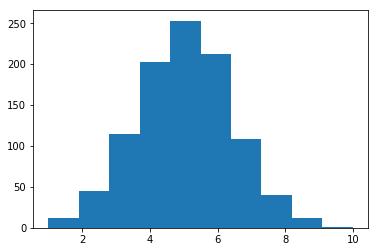

In [16]:
plt.hist(x = np.random.binomial(10, 0.5, 1000)) 
# number of trials = 10, probability of each trial = 50%, tested 1000 times.

So, when tested 1,000 times, 5 out of 10 trials conducted gave a successful result on 250 occasions.

### Using Seeds in Random Number Generation (RNG)

To initiate a random number sequence a 'seed' value is required. Typically this could be the timestamp, down to the microsecond, from the processor when the RNG program starts. But the seed could be generated from any random source - eg. the temperature of the processor, or a number found somewhere in the decimal expansion of the value for Pi. The seed is critical to the security of a pseudo random number sequence. As long as it's unknown to any program trying to 'crack' it, it's virtually impossible to guess what the next value in the sequence will be. The numpy.random library includes four functions which can be used in random number generation, examples of which now follow:

#### The RandomState function

A range of probability distributions is available to use within the RandomState function. For a uniform distribution, in which every value in the range defined has an equal chance of being picked, we can use the numpy.random.uniform function:

In [ ]:
import numpy as np

(array([ 96., 106.,  95., 102.,  95., 110., 105.,  96.,  92., 103.]),
 array([-0.82836149,  9.14776628, 19.12389405, 29.10002182, 39.07614959,
        49.05227736, 59.02840513, 69.0045329 , 78.98066067, 88.95678844,
        98.93291621]),
 <a list of 10 Patch objects>)

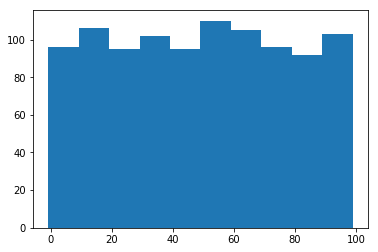

In [27]:
# The sample size is 1000 and all values are within the given interval of >= -1 and 99.
s = np.random.uniform(-1,99,1000)
plt.hist(s)


## Bayes Theorem - a Simulation

In [ ]:
import numpy as np
print(np.random.binomial(1,0.01))
# experiment runs once(1) with 1% prob of a positive result
# expect result will be zero 99 times out of 100

x = np.random.binomial(1, 0.01, 1000)
print(np.sum(x))
# now it runs 1,000 times,how often is the result positive?
# expect results to cluster around a mean of 10

### coding the simulation

In [ ]:
# Helper function, returns True with probability P, False otherwise.\n",
def true_with_prob_p(p):
    return True if np.random.binomial(1, p) == 1 else False
    
    # Simulate the selection of a random person from the population.
    # Return True if they are a drug user, False otherwise.
    # True is returned with probability 0.005.
    
def select_random_person():
    return true_with_prob_p(0.005)\
    
    # Simulate the testing of a person from the population.
    # Return True if they test positive, False otherwise.
    # Non-users test positive with probability 0.01.
    # Users test positive with probability 0.99.
def test_person(user):
    if user:\
        return true_with_prob_p(0.99)
    else:
        return true_with_prob_p(0.01)
    
    # Run an experiment - take a random person from the population
    # and test whether or not they are positive.
def run_experiment():
    user = select_random_person()
    test = test_person(user)
    return (user, test)

In [ ]:
# Run the experiment 10,000 times.
y = [run_experiment() for i in range(10000)]
# Count the number of users who tested positive.
user_and_positive = [True for i in y if i[0] == True and i[1] == True]

# Count the number of non-users who tested positive.
nonuser_and_positive = [True  for i in y if i[0] == False and i[1] == True]


In [ ]:
np.sum(user_and_positive)

In [ ]:
np.sum(nonuser_and_positive)

In [ ]:
import matplotlib.pyplot as plt
plt.show()

plt.bar([0, 1], [np.sum(user_and_positive), np.sum(nonuser_and_positive)])
plt.xticks([0, 1], ('Users', ('Non-Users')))
plt.title("People who tested positive")

## Analysis
### P(User\Positive) = P(Positive\User) * P(user)
###                                       all  / P(Positive)
### also =  P(Positive\User) * P(user)
###     all  / P(Positive\User) * P(user) + P(Positive\NonUser) * P(NonUser)

In [ ]:
# Probability that you're a user.
p_user = 0.005

# Probability that you're a non-user.
p_nonuser = 1 - p_user

# Probability that a user tests positive.
p_positive_user = 0.99

# Probability that a non-user tests negative.
p_positive_nonuser = 1.0 - 0.99

# Probability that you test positive.
p_positive = p_positive_user * p_user + p_positive_nonuser * p_nonuser

# Bayes' theorem.
top_line = p_positive_user * p_user
bottom_line = p_positive
p_user_positive = top_line / bottom_line

# Show result.
print(p_user_positive)

## Exploring PANDAS

#### About the Iris data set from UC Irvine's machine learning repository
(https://archive.ics.uci.edu/ml/datasets/iris)

## Loading Data

In [ ]:
import pandas as pd
# Load the iris data set from a URL.
df = pd.read_csv ("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
# df means "data frame" - a data structure in Pandas, its a 2 dimensional array. In this case
# it has 4 columns of floating-point values, 1 column of 'strings'(ie. non numeric classes) and 1
# "index" column to reference each row.

### this imports a basic flat file (csv) with headers, then formats it nicely, as follows: 

In [ ]:
df

#### Pandas 'looks at' the values in the rows & column first, to figure out how best to format the table - eg. it detects floating-point values, strings etc. It also looks at the first row to see if it appears to be headers, rather than values. 

In the above table, it added row labels (1-149) and although they look like an ordered index, they are simply labels.

In this respect, Pandas is more sophisticated than numpy - which can only handle a dataframe of homogeneous types - eg. every cell is a floating-point value, or a string, etc. It cannot detect different data types.

## To make sub-selections from a dataframe in Pandas
#### columns and/or rows may have labels, or not. You can slice & name them with Pandas

## Selecting Rows and Columns

In [ ]:
df[['petal_length', 'species']]

In [ ]:
df[2:6]

just told it "give me rows 2 up to, but not including, 6".

You can also combine both types of command in one call:

In [ ]:
df[['petal_length', 'species']][2:6]

# However !
### this notation approach is not recommended - can cause issues. The double [[ ]] is a clue that you're taking chances ....

### As safer approach to use loc and iloc

### loc uses labels, iloc uses position ....

In [ ]:
df.loc[2:6]

### it returned rows 2 to 6 because it looks at the labels - and those row numbers are labels, rather than values. If we had used iloc there, it would have excluded row 6. 
### Now - to get a column back:

In [ ]:
df.loc[:, 'species']

### in that command, the colon meant "all" - so, all rows, and just the 'species' column. Now try this approach ....

In [ ]:
df.loc[2:6, ['sepal_length', 'species']]

### so "give me this list of column labels, and this list of row labels"
### note that the original row labels persist (eg. first one is '2') - be aware of this effect when using loc. Whereas ... iloc returns position:

In [ ]:
df.iloc[2]

#### that returned the values from the row position 2 (remember, 0 is the first)

In [ ]:
df.iloc[2:4,1]

### that returned the values from rows in position 2 to 4, and column position 1 (which is the 2nd column)

Now, the 'at' command can be used to return a sibgle value from an array:

In [ ]:
df.at[3, 'species']

### ... *so, loc uses Labels, iloc uses Positions* !

## Boolean Selects:

In [ ]:
df.loc[:, 'species'] == 'setosa'

###   == compared the value in "species" to the string "setosa" - if its setosa, then its TRUE.

Now, to return just the rows with the setosa string:

In [ ]:
df.loc[df.loc[:, 'species'] == 'setosa']

In [ ]:
df.loc[df.loc[:, 'species'] == 'versicolor']

In [ ]:
df.loc[df.loc[:, 'species'] == 'setosa']

In [ ]:
x = df.loc[df.loc[:, 'species'] == 'virginica']
x

In [ ]:
x.loc[51]

that returned the values in row *labeled* 51. Using iloc to get the same result requires you to specify the *position* of that row in the new dataframe, which is actually pos 1.

In [ ]:
x.iloc[1]

## Summary Statistics

#### to take a quick look at a dataframe (maybe an imported CSV file) to see if it looks clean & structured, its useful to use these 'head', 'tail' and other commands.

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.mean()

### btw - the 50% above is the 50th percentile = the median. So 50% of the values are less than this datapoint.

you may want to subtract the mean from all the values in order to 'centre' (or "whiting") the dataset - then each value is delta from the mean

### PLOTS

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df)

Then, by adding the 'hue' command, you can distinguish the varieties of iris in the dataset by means of colour:

In [ ]:
sns.pairplot(df, hue='species')

.... that command returned histograms in the diagonal position.

In [ ]:
sns.pairplot(df, hue='species', diag_kind= 'kde')

... that command returned curves in the diagonal position.